# Background

# Objective
ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate the resources accordingly. I will do the following tasks in this project:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers. 
* Find the factors driving the lead conversion process.
* Create a profile of the leads which are likely to convert.

# Data
The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.

- ID: ID of the lead
- age: Age of the lead
- current_occupation: Current occupation of the lead. Values include 'Professional', 'Unemployed', and 'Student'
- first_interaction: How did the lead first interact with ExtraaLearn? Values include 'Website' and 'Mobile App'
- profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app? Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
- website_visits: The number of times a lead has visited the website
- time_spent_on_website: Total time spent on the website
- page_views_per_visit: Average number of pages on the website viewed during the visits
- last_activity: Last interaction between the lead and ExtraaLearn
- Email Activity: Seeking details about the program through email, Representative shared information with a lead like a brochure of the program, etc.
- Phone Activity: Had a phone conversation with a representative, had a conversation over SMS with a representative, etc.
- Website Activity: Interacted on live chat with a representative, updated profile on the website, etc.
- print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper
- print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine
- digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms
- educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
- referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
- status: Flag indicating whether the lead was converted to a paid customer or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Algorithms 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# evaluate the model
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# model tuning
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/Users/yuchenzhou/Desktop/MIT/project_practical_ds/ExtraaLearn.csv')
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [3]:
data.shape

(4612, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

As there is no missing values in the dataset, we do not need to fill any mising values.

In [5]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Since there are many unique values in ID, and it does not have exact meanings in this task, we will drop it from the dataset.

In [6]:
data = data.drop(['ID'] , axis = 1)

In [7]:
# numerical columns
num_cols = ['age','website_visits','time_spent_on_website','page_views_per_visit','status']

# categorical variables
cat_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1',
           'print_media_type2','digital_media','educational_channels','referral']

# Exploratory Data Analysis and Data Preprocessing

### **Univariate analysis of numerical columns**

In [8]:
# Checking summary statistics
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


**Observations:**

- **Average customer age is around 46 years**. It has a big range, from 18 years to 63, indicating good age diversity in the organization.
- **The avereage website visit is roughly 3.56**. It is a big range, from 0 to 30, and the average shows that most clients have only a few visits. 
- **The average time spend on wesite is 724(min).** It has a high range of values from 0 to 2537. There is a big difference between the 2nd quartile value (around 376) and the 3rd quartile value (aroud 1337), showing that the **time spend one website by customers are disproportional** .
- **The average page views per visit is around 3.** There is no big range of this and it seems that clients in the dataset has similar number of page views. 
- **On average, only 29% of the clients in the dataset has been converted to paid customer. 

age
Skew : -0.72


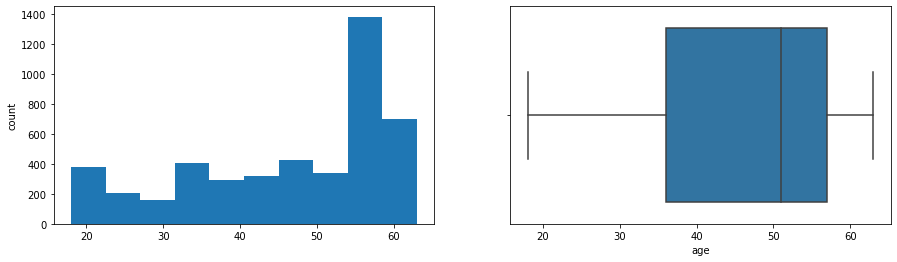

website_visits
Skew : 2.16


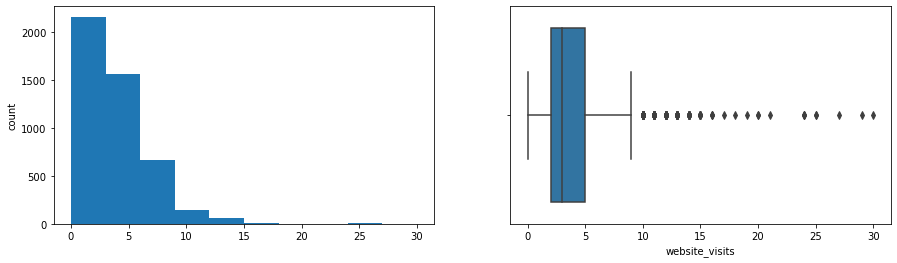

time_spent_on_website
Skew : 0.95


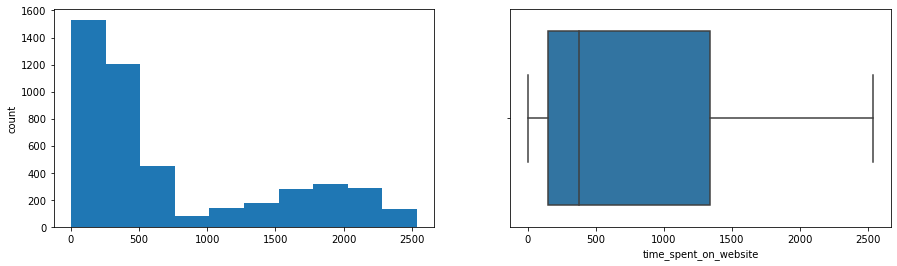

page_views_per_visit
Skew : 1.27


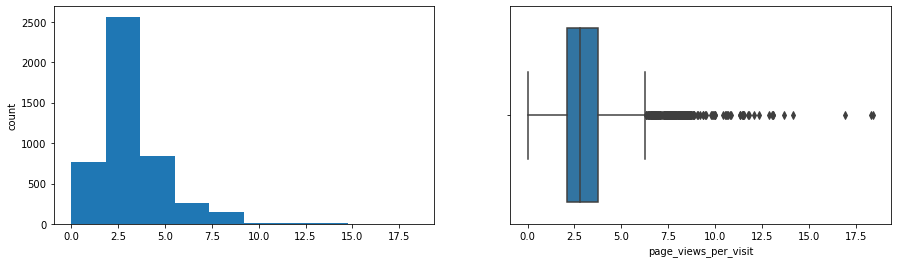

In [9]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    
    print('Skew :',round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**

- **Thereis no distribution close to normal distribution**.
- **The website_visits and page_views_per_visit are right skewed**, meaning most website visits data are distribution in very low values. From the boxplot we can see there are lots of outliers on the right tail.
- **Age is approaching left skewed**, indicating that the majority of customers are mid-aged or old. The boxplot verifies that.
- **time_spend_on_website is heavily clusetering in small values**, which means most clients do not spend much time online.

### **Univariate analysis of categorical columns**

In [10]:
# Printing the % sub categories of each category.
for i in cat_cols:
    
    print(data[i].value_counts(normalize = True))
    
    print('*' * 40)

Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: current_occupation, dtype: float64
****************************************
Website       0.551171
Mobile App    0.448829
Name: first_interaction, dtype: float64
****************************************
High      0.490893
Medium    0.485906
Low       0.023200
Name: profile_completed, dtype: float64
****************************************
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: last_activity, dtype: float64
****************************************
No     0.892238
Yes    0.107762
Name: print_media_type1, dtype: float64
****************************************
No     0.94948
Yes    0.05052
Name: print_media_type2, dtype: float64
****************************************
No     0.885733
Yes    0.114267
Name: digital_media, dtype: float64
****************************************
No     0.847138
Yes    0.152862
Name: educational_channels, dtype: float64
******

### **Observations:**

- **Most of the customers' occupation are prfessional and student has the least proportion.**
- **Customers first interact with the website through mobile but 45% of them first interact with the website.** This number appears to be on the higher side and might indicate a stressed employee work-life.
- Most of the customers have filled their profile a lot. 
- Email Activity is the largest portion of customers' Last interaction between the lead and ExtraaLearn.
- As for media exposure, most of the clients have seen Extralearn on newspaper, magazine and digital platforms.
- 85% about the customers heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
- 98% customers heard about ExtraaLearn through reference.

### **Bivariate Analysis**

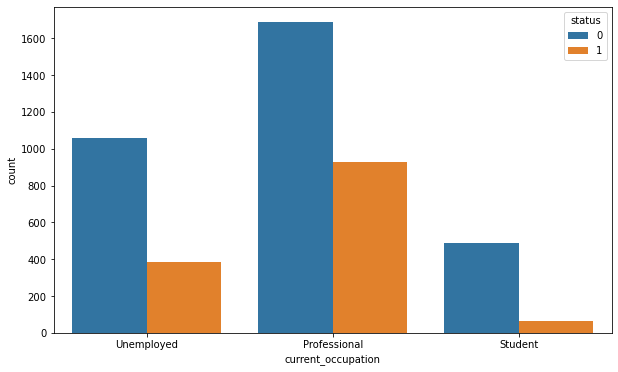

In [11]:
# current occupation and status
plt.figure(figsize = (10, 6))

sns.countplot(x = 'current_occupation', hue = 'status', data = data)

plt.show()

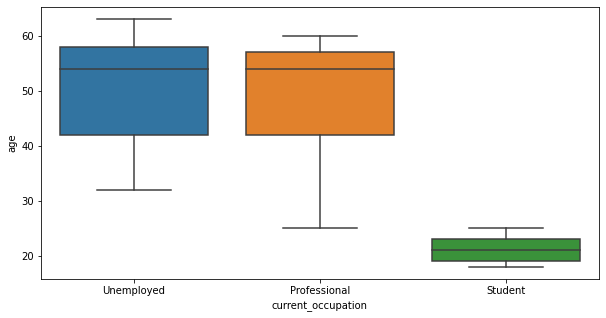

In [12]:
plt.figure(figsize = (10, 5))

sns.boxplot(data["current_occupation"], data["age"])

plt.show()

**Observations:**

- The plot shows that working professional leads are more likely to opt for a course offered by the organization and the students are least likely to be converted. 
- This shows that the currently offered programs are more oriented toward **working professionals** or **unemployed personnel**. The programs might be suitable for the working professionals who might want to transition to a new role or take up more responsibility in their current role. And also focused on skills that are in high demand making it more suitable for working professionals or currently unemployed leads.


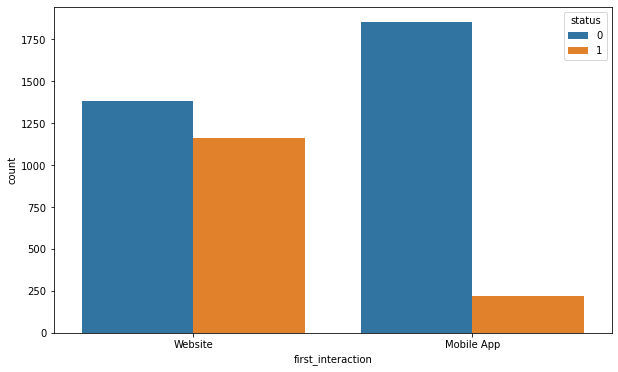

In [15]:
# first interaction and status
plt.figure(figsize = (10, 6))

sns.countplot(x= 'first_interaction', hue = 'status',data=data)

plt.show()

**Observations:**

* The website seems to be doing a good job as compared to mobile app as there is a huge difference in the number of conversions of the leads who first interacted with the company through website and those who interacted through mobile application.
* Majority of the leads who interacted through websites were converted to paid customers, while only a small number of leads, who interacted through mobile app, converted.

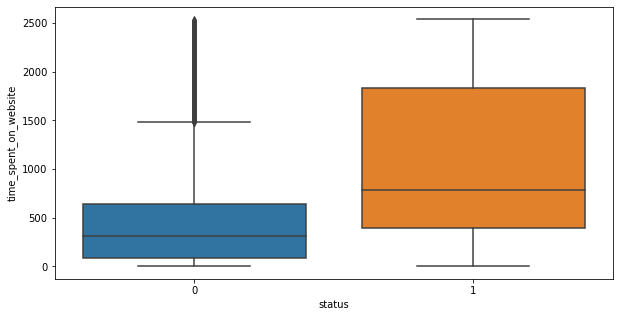

In [16]:
# time spent on website and status
plt.figure(figsize = (10, 5))
sns.boxplot(data['status'], data['time_spent_on_website'])
plt.show()

**Observations:**
* Customers who have been converted spend more time on website, with a higher min, max, and mean value of time spent on website.

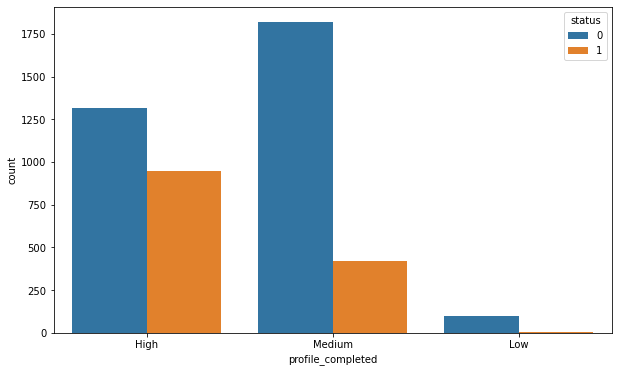

In [17]:
# profile completed and occupation
plt.figure(figsize = (10, 6))

sns.countplot(x = 'profile_completed', hue = 'status', data = data)

plt.show()

**Observations:**

* The leads whose profile completion level is high converted more in comparison to other levels of profile completion.
* The medium and low levels of profile completion saw comparatively very less conversions.
* The high level of profile completion might indicate a lead's intent to pursue the course which results in high conversion.

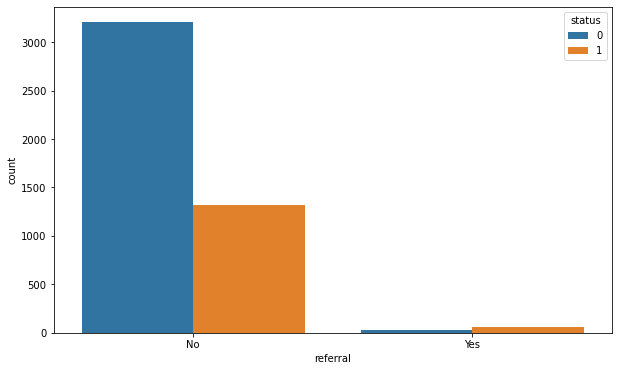

In [18]:
# referral and status
plt.figure(figsize = (10, 6))

sns.countplot(x = 'referral', hue = 'status', data = data)

plt.show()

**Observations:**
* There are a very less number of referrals but the conversion is high. 
* Company should try to get more leads through referrals by promoting rewards for existing customer base when they refer someone.

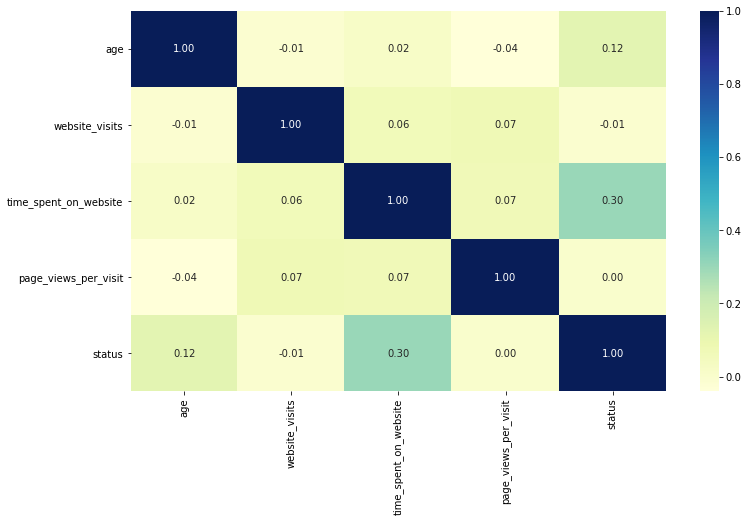

In [19]:
plt.figure(figsize = (12, 7))
cmap = 'YlGnBu'
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

**Observations:**
* time_spent_on_website have relatively strong correlation with the status, and it makes sense that people spend more time online, they got to know more details and they are more likely to be converted.
* There is some correlation between status and age but no obvious correlations observed.

### <a id='eda'>Summary of Dataset</a>

**Data Description:**
- There are **4612 observations and 14 columns** in the dataset.
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

**Observations from EDA:**

- **`ID` is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **On average, the customer age is around 46 years**. 
- **The avereage website visit is roughly 3.56**. It is a big range, from 0 to 30, and the average shows that most clients have only a few visits. 
- **The average time spend on wesite is 724(min).** It has a high range of values from 0 to 2537. There is a big difference between the 2nd quartile value (around 376) and the 3rd quartile value (aroud 1337), showing that the **time spend one website by customers are disproportional** .
- **The average page views per visit is around 3.** There is no big range of this and it seems that clients in the dataset has similar number of page views. 
- **On average, only 29% of the clients in the dataset has been converted to paid customer. 

- Most clients are professional workers rather than students.
- Most clients first interact with the website through mobile and website.
- Email activity is the main promotion channel and 85% of customers have heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc. Most of them have seen Extralearn on newspaper, magazine and digital platforms.
- 98% of converted customers heard about Extralearn through reference. 

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for the categorical variables**

In [20]:
data.columns

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

In [21]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['print_media_type1','print_media_type2',
                      'digital_media','educational_channels','referral']

# Mapping overtime and attrition
dict_np = {'Yes': 1, 'No': 0}
dict_mg = {'Yes': 1, 'No': 0}
dict_dg = {'Yes': 1, 'No': 0}
dict_ed = {'Yes': 1, 'No': 0}
dict_rf = {'Yes': 1, 'No': 0}

data['print_media_type1'] = data.print_media_type1.map(dict_np)
data['print_media_type2'] = data.print_media_type2.map(dict_mg)
data['digital_media'] = data.digital_media.map(dict_dg)
data['educational_channels'] = data.educational_channels.map(dict_dg)
data['referral'] = data.referral.map(dict_dg)
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,1,0,1,0,0,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,0,0,0,1,0,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,0,0,1,0,0,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,0,0,0,0,0,1
4,23,Student,Website,High,4,600,16.914,Email Activity,0,0,0,0,0,0


**Encoding categorical features into numerical values**

In [22]:
#current_occupation
le = LabelEncoder()
OHE = OneHotEncoder()
df_var = le.fit_transform(data['current_occupation'])
OHE.fit(df_var.reshape(-1,1))
var_transform = OHE.transform(df_var.reshape(-1,1)).toarray()
cat = pd.DataFrame(var_transform,columns = ['professional','unemployed','student'])
data = pd.concat([data,cat],axis=1)
data = data.drop(columns=['current_occupation'])
data.head()

,age,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,professional,unemployed,student
0,57,Website,High,7,1639,1.861,Website Activity,1,0,1,0,0,1,0.0,0.0,1.0
1,56,Mobile App,Medium,2,83,0.320,Website Activity,0,0,0,1,0,0,1.0,0.0,0.0
2,52,Website,Medium,3,330,0.074,Website Activity,0,0,1,0,0,0,1.0,0.0,0.0
3,53,Website,High,4,464,2.057,Website Activity,0,0,0,0,0,1,0.0,0.0,1.0
4,23,Website,High,4,600,16.914,Email Activity,0,0,0,0,0,0,0.0,1.0,0.0


In [23]:
# fist_interaction
le = LabelEncoder()
OHE = OneHotEncoder()
df_var2 = le.fit_transform(data['first_interaction'])
OHE.fit(df_var2.reshape(-1,1))
var_transform2 = OHE.transform(df_var2.reshape(-1,1)).toarray()
cat2 = pd.DataFrame(var_transform2,columns = ['Mobile App','website'])
data = pd.concat([data,cat2],axis=1)
data = data.drop(columns=['first_interaction'])
data.head()

,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,professional,unemployed,student,Mobile App,website
0,57,High,7,1639,1.861,Website Activity,1,0,1,0,0,1,0.0,0.0,1.0,0.0,1.0
1,56,Medium,2,83,0.320,Website Activity,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0
2,52,Medium,3,330,0.074,Website Activity,0,0,1,0,0,0,1.0,0.0,0.0,0.0,1.0
3,53,High,4,464,2.057,Website Activity,0,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0
4,23,High,4,600,16.914,Email Activity,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0


In [24]:
# profile_completed
le = LabelEncoder()
OHE = OneHotEncoder()
df_var3 = le.fit_transform(data['profile_completed'])
OHE.fit(df_var3.reshape(-1,1))
var_transform3 = OHE.transform(df_var3.reshape(-1,1)).toarray()
cat3 = pd.DataFrame(var_transform3,columns = ['High','Median','Low'])
data = pd.concat([data,cat3],axis=1)
data = data.drop(columns=['profile_completed'])
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,professional,unemployed,student,Mobile App,website,High,Median,Low
0,57,7,1639,1.861,Website Activity,1,0,1,0,0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,56,2,83,0.320,Website Activity,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,52,3,330,0.074,Website Activity,0,0,1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53,4,464,2.057,Website Activity,0,0,0,0,0,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,23,4,600,16.914,Email Activity,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [25]:
# last activity
le = LabelEncoder()
OHE = OneHotEncoder()
df_var4 = le.fit_transform(data['last_activity'])
OHE.fit(df_var4.reshape(-1,1))
var_transform4 = OHE.transform(df_var4.reshape(-1,1)).toarray()
cat4 = pd.DataFrame(var_transform4,columns = ['Email','Phone','Website'])
data = pd.concat([data,cat4],axis=1)
data = data.drop(columns=['last_activity'])
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,...,unemployed,student,Mobile App,website,High,Median,Low,Email,Phone,Website
0,57,7,1639,1.861,1,0,1,0,0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,56,2,83,0.320,0,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,52,3,330,0.074,0,0,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53,4,464,2.057,0,0,0,0,0,1,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23,4,600,16.914,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


**Separating the independent variables (X) and the dependent variable (Y)**

In [26]:
# Separating the target variable and other variables

Y = data.status

X = data.drop(['status'], axis = 1)

**Splitting the data into 70% train and 30% test set**

In [27]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## **Building the model**

I will be building 2 different models:

- **Decision Tree**
- **Random Forest**


### **Building a Decision Tree Model**

* I will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [28]:
# Building decision tree model
dt = DecisionTreeClassifier(random_state = 7)

In [29]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=7)

**Check the model performance of decision tree**

In [30]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



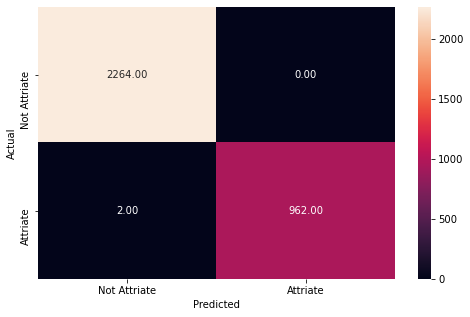

In [31]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       971
           1       0.65      0.65      0.65       413

    accuracy                           0.79      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.79      0.79      0.79      1384



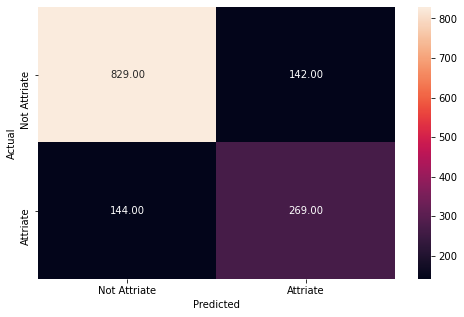

In [32]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**
- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.65 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 65% (1 - 0.65) chance that the model will predict that a person is going to be converted even though he/she would not be, and **the company may overestimate their marketing effects and waste time and money in marketing.**


### **Tuning Models**

In [33]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 7)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



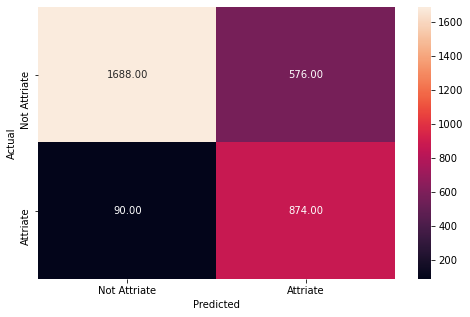

In [34]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



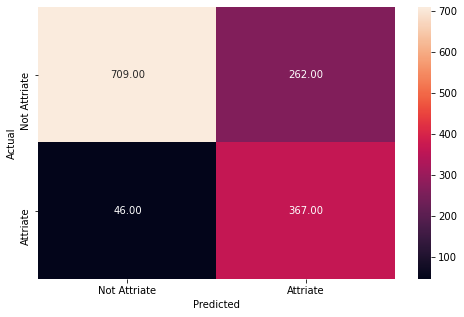

In [36]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

* In terms of precision, the score of class 0 has improved compared with the untuned decision tree model, but the precision of class 1 has gone down a bit.
* The recall and f1-score of class one has gone up.


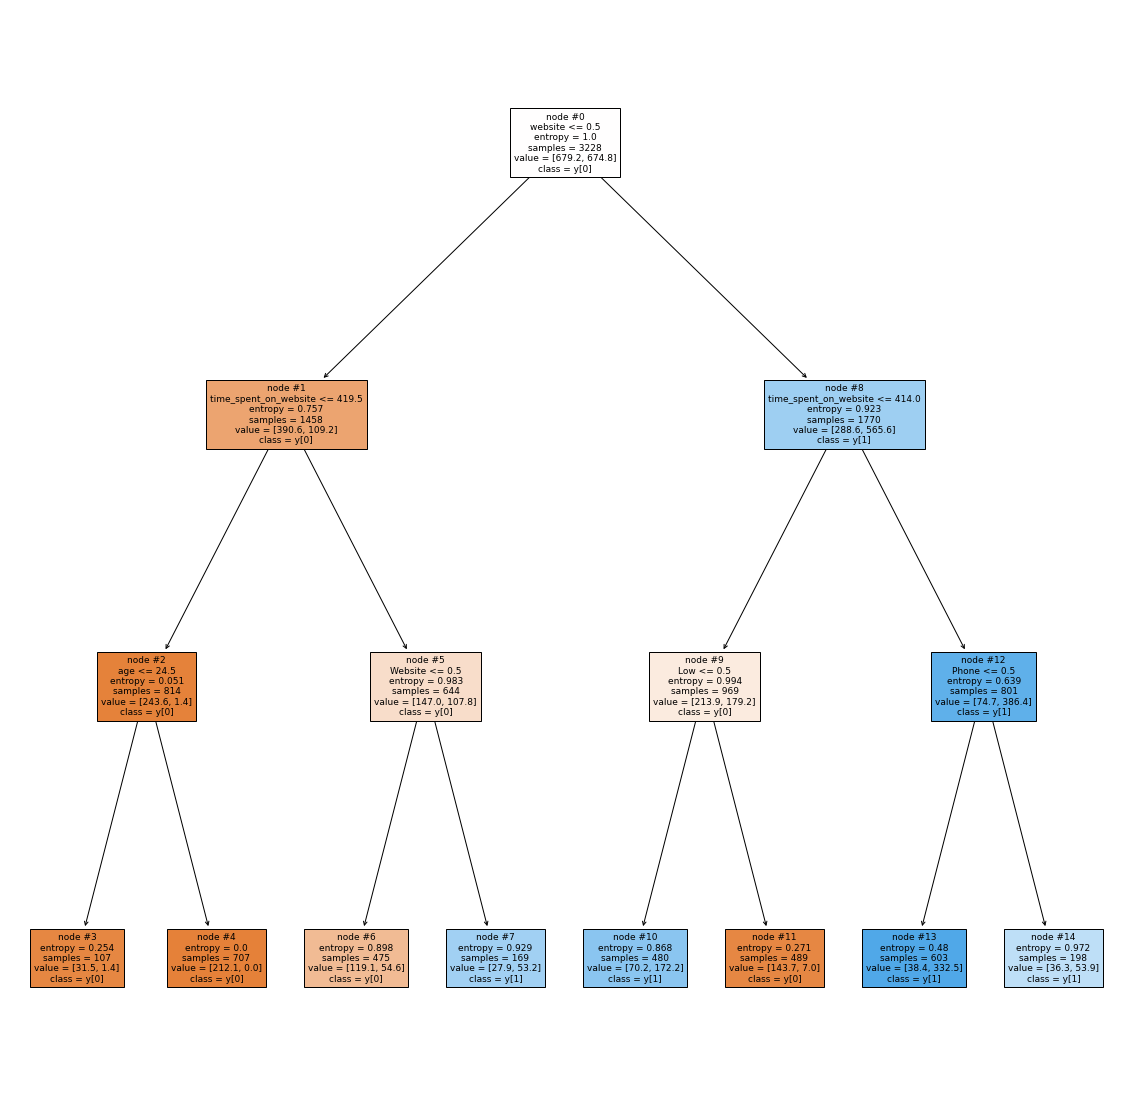

In [37]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(dtree_estimator, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
* The more time spent on website, and the older the client is, the more likely he/she will be converted.
* When a client spent less than 419.5 minutes on website, the less the profile is completed, the more likely he/she will be converted.
* If the customer has interacted on live chat with a representative, updated profile on the website, etc. more, he/she will be converted more likely.

#### Look at the feature importance

<AxesSubplot:xlabel='Importance'>

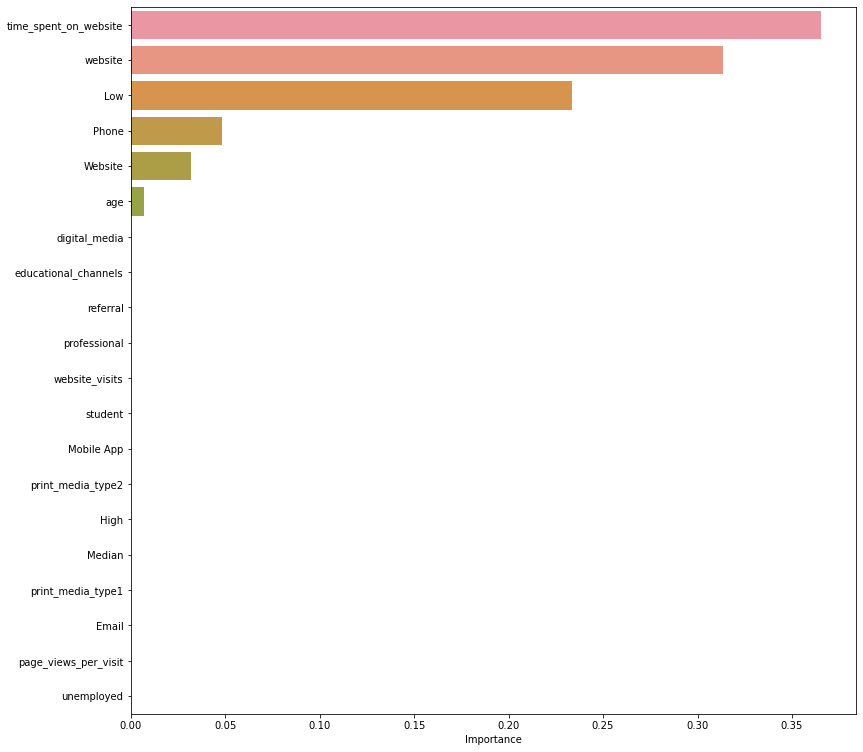

In [38]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)


**Observations:**

- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.




### **Building a Decision Tree Model**

In [40]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



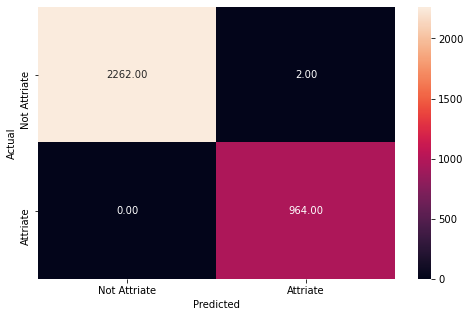

In [41]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       971
           1       0.79      0.74      0.76       413

    accuracy                           0.86      1384
   macro avg       0.84      0.83      0.83      1384
weighted avg       0.86      0.86      0.86      1384



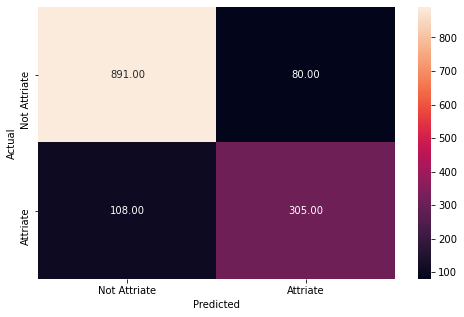

In [42]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test3)


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.70 for class 1.
- Precision is not high for the test data (only 0.80 for class 1), compared to 1 for the training data. 

### **Random Forest Classifier - Hyperparameter Tuning**


In [45]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.7, 1: 0.3}, "balanced", {0: 0.4, 1: 0.1}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=110, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2264
           1       0.71      0.87      0.78       964

    accuracy                           0.86      3228
   macro avg       0.83      0.86      0.84      3228
weighted avg       0.87      0.86      0.86      3228



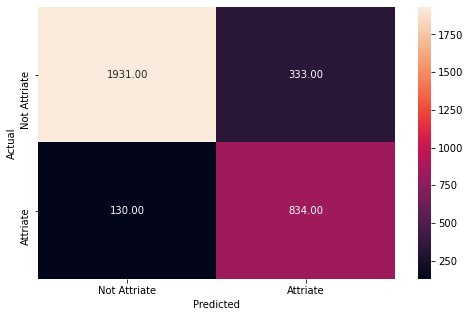

In [46]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(x_train, y_train)

# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train4)

**Observations:**
* Compared to the untuned random forest model, the tuned model has lower score in precision, recall and F1. It means that perhaps the untuned model is overfitting on the training data.

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       971
           1       0.70      0.82      0.76       413

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.84      0.85      1384



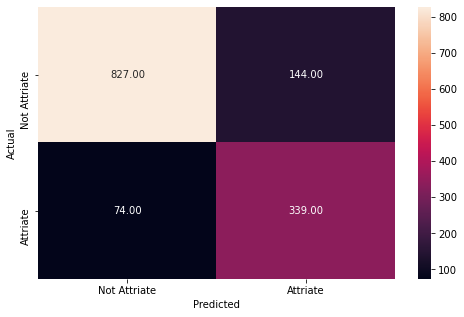

In [47]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test5)

**Observations:**
* After hyperparameter tuning, precicision of class 0 improved from 0.89 to 0.92 while precision of class 1 has decreased. 
* recall and f1-score of class 1 has improved but those of class 0 has decreased. 

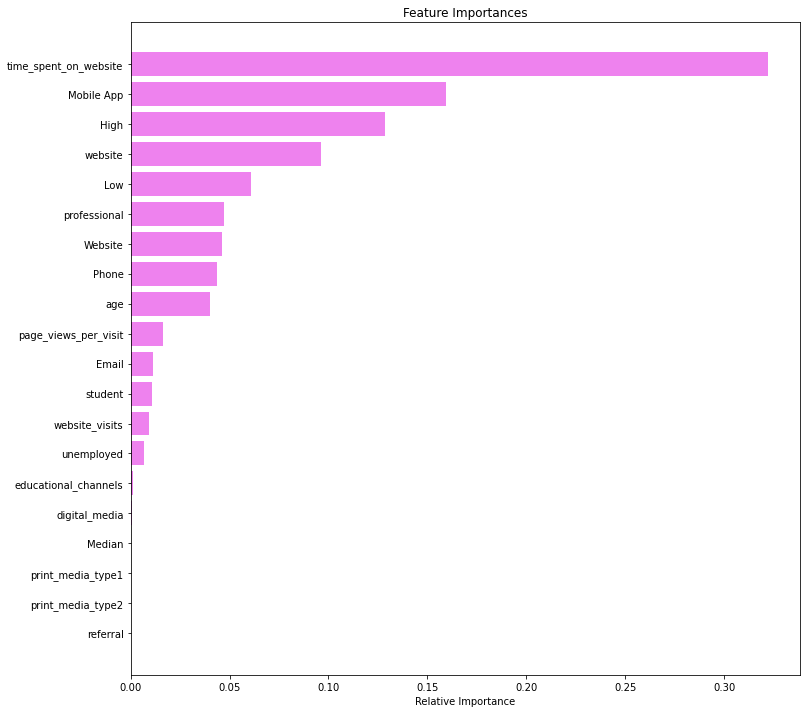

In [48]:
# feature importance
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website is the most significant feature** that help distinguish between not converted and converted leads. **age, professional and page_views_per_visit** are also worth noting.
- Unlike the decision tree, **the random forest gives some importance to other variables like High, Mobile App, Low, Phone.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusions:**
#### 1. Customer type
Compared to students, **working professional leads** are more likely to opt for a course. And this is consistent with the fact that the average age of the leads is 46 and most of the leads are of an old age. In random forest model we have proved that occupation is an important feature.



#### 2. Customer behaviors
2.1 Time spent on website : Converted customers **spend more time on website** than the unconverted. From the correlation analysis we also observed that convertion and time spent on website have relatively strong correlation.

2.2 Customers who **interact with ExtraLear on website show higher conversion rate** than those who interact with Extralearn on mobile app.

2.2 Converted customers have better **profile completion** than the unconverted. 

2.3 Converted customers **spend more time on website**. 

2.4 Approx 49.4% of the leads had their last activity over **email**, followed by 26.8% having phone activity. This implies that the majority of the leads prefer to communicate via email.

2.5 Most of the converted leads are from referrals.


### **Business Recommendations**
There are couple of things we can do according to the characteristics of converted leads. For example, since the majority of converted leads are working professionals and mid-aged, we should 1)design our courses with more professional contents included with hands-on practices, and 2)promote courses in channels these professionals are exposed to. In terms of course design, we need to include more examples, projects and even networking opportunities so that users can complete projects to enrich their resume and connect with experts in the field, which are important in job promotion. As for course promotion, we need to explore websites that working professionals browse the most, and can even find key opinon leaders on Youtube or Instagram to ask for cooperation. 


As for customer behaviors, we can continue and improve current promotion strategies on websites since it has good conversion. As mentioned before, we need to explore more good targets online to do promotion other than traditional ads channel like google, facebook, etc. Moreover, we should improve promotion for the mobile app. People will rely more on cellphone in the future and app will definitely be a good market with considerable flows. On the product side, we need to upgrade the interface design and make the tools inside user friendly. On the app promotion side, we could think about ways to guide users to download and register for the app, and most importantly, make the whole process easy and straightforward. 

Since the majority of the conversion is from referral, we need to let customers 

Another point worth noting is the time spent on website. Since it is highly correlated with conversion, we can include interesting sections on the webpage to encourage people to stay for longer time. For example, we can include some sample courses, like tutorials on the website and include a reward mechanism in the small quizzes, so that users can see enough information about the course and get mental satisfaction as well. The more time they spend on the website, the better they know our products and the stronger intention they have to know our products more. That will eventually lead to conversion. We also observed that page_views_per_visit can be significant to conversion. It corresponds to the fact that more time spent on website leads to higher probability of conversion. 

Moreover, live chat representative is important, since we observed that if the customer has interacted on live chat with a representative, he/she will be converted more likely. It makes sense that throught the representative, customer will understand better about the details of the products. Thus, we should add more professional trainings to the live chat representatives, not only in terms of introducing the product, but also in aspects of making customers realize they really need our courses. 

Above are the facts that we can improve to boost our conversion. 